![spinning brain](https://media.giphy.com/media/3ohhwAFQVOwhzodl2U/giphy.gif)


# Brain Networks in Python

Hi im Isla Staden and I'm working with Dr Kirstie Whitaker who is a former mozilla fellow for science and a mentor in this program. She and I care a lot about reproducible research and we're trying to make reproducible network neuroscience easier.
Kirstie published a paper looking at teenage brain development last year. What we're doing now is taking the codebase she used for that paper and adapting it to be more generally useful. At the moment most of our efforts are in refactoring it, introducing testing, providing documentation and tutorials.


## why we care about the brain as a network

The brain works by sending messages between different parts so it makes sense to model those connections and think of the brain as a network. 

you can split up the brain into different parts and calculate measures of a person's brain structure in these regions. And then we can build a correlation matrix and from that see how different parts of the brain are connected to each other.

## A quick overview of what BrainNetworksInPython can do

In [1]:
import sys
import os

# We add our wrappers, scripts and example_data folders to the searchpath
sys.path.append('./wrappers')
sys.path.append('./example_data')
sys.path.append('./scripts')                           

### Creating a correlation matrix

We read in regional cortical thickness data for a cohort of subjects. An input file would look something like this:

| Subject | rh_lingual_part3_thickness | rh_lingual_part4_thickness | rh_lingual_part5_thickness | rh_lingual_part6_thickness | rh_medialorbitofrontal_part1_thickness | rh_medialorbitofrontal_part2_thickness |
|---------|----------------------------|----------------------------|----------------------------|----------------------------|----------------------------------------|----------------------------------------|
| 1       | 2.178                      | 1.89                       | 2.105                      | 2.334                      | 2.514                                  | 2.315                                  |
| 2       | 2.668                      | 2.507                      | 2.62                       | 2.594                      | 3.045                                  | 3.299                                  |
| 3       | 2.65                       | 2.261                      | 2.504                      | 2.572                      | 3.207                                  | 3.043                                  |
| 4       | 2.52                       | 2.513                      | 1.862                      | 2.344                      | 2.354                                  | 2.706                                  |
| 5       | 1.982                      | 2.113                      | 1.859                      | 2.573                      | 2.298                                  | 1.918                                  |
| 6       | 2.758                      | 2.741                      | 2.305                      | 2.782                      | 2.372                                  | 2.367                                  |
| 7       | 2.351                      | 2.168                      | 2.176                      | 2.58                       | 2.876                                  | 3.09                                   |
| 8       | 2.302                      | 2.342                      | 2.082                      | 2.664                      | 2.654                                  | 2.548                                  |
| 9       | 2.478                      | 2.744                      | 2.284                      | 2.701                      | 2.819                                  | 2.873                                  |

From this data we construct a matrix of correlations between regions

In [2]:
# We define our file locations. If you are using your own data these are the locations that you will want to change
centroids_file = "./example_data/500.centroids.txt"         
names_file = "./eample_data/500.names.txt"                   
regionalmeasures_file ="./example_data/PARC_500aparc_thickness_behavmerge.csv" 

# We choose where to output our corrmat file
corrmat_file = os.getcwd()+'/corrmat_file.txt'   

import corrmat_from_regionalmeasures as cfrm
cfrm.corrmat_from_regionalmeasures(regionalmeasures_file, names_file, corrmat_file, names_308_style=True)

The correlation matrix (represented as a heatmap) looks like this

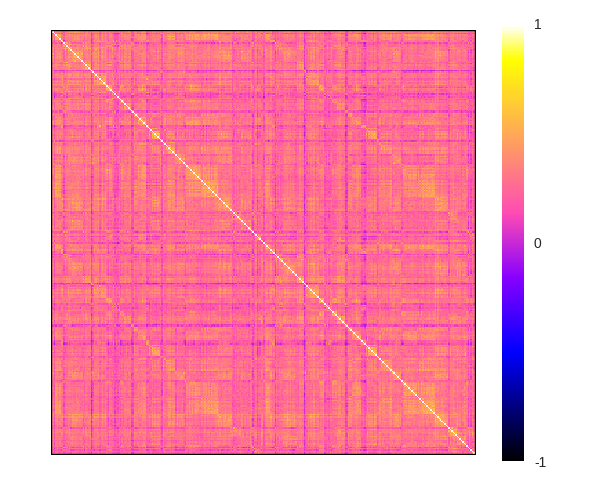

In [3]:
import visualisation_commands as vc
corrmat_picture=os.getcwd()+'/corrmat_picture'
vc.view_corr_mat(corrmat_file, corrmat_picture, cmap_name='gnuplot2')
from IPython.display import Image
Image("corrmat_picture.png")

### A network from our correlation matrix

We're going to use our correlation matrix to create a network. First we choose a minimum spanning tree for our brain regions- taking the edges with largest correlation. Then we add in the edges by correlation until we reach our cost threshold.

In [4]:
# Once again, this is going to write some files, so we give it a location
network_analysis = os.getcwd()+'/network_analysis'
# This is going to take a couple of minutes
import network_analysis_from_corrmat as nafc
network_analysis = os.getcwd()+'/network_analysis'
nafc.network_analysis_from_corrmat(corrmat_file,
                                  names_file,
                                  centroids_file,
                                  network_analysis,
                                  cost=10,
                                  n_rand=1000,
                                  names_308_style=True)

        Calculating participation coefficient - may take a little while
        Creating 1000 random graphs - may take a little while


Our network measures:
* __nodal measures__
    * degree
    * participation coefficient
    * average distance
    * total distance
    * clustering
    * closeness
    * interhemispheric proportion  


* __global measures__  
    To have context for our global network measures, we need similar graphs to compare them to. We create these by performing edge swaps with a default setting of 10 edge swaps per edge. We use this method because it preserves degree distribution.
    * Clustering coefficient
    * Shortest Path Length
    * Assortativity
    * Modularity
    * Efficiency
    * Small world  


* __rich club__
    The rich club coefficient at degree n measures the extent to which degree >= n nodes are also connected to degree >= n nodes. BrainNetworksInPython calculates the rich club coefficient for each degree value in the graph.

### Visualising the data


make pretty graph

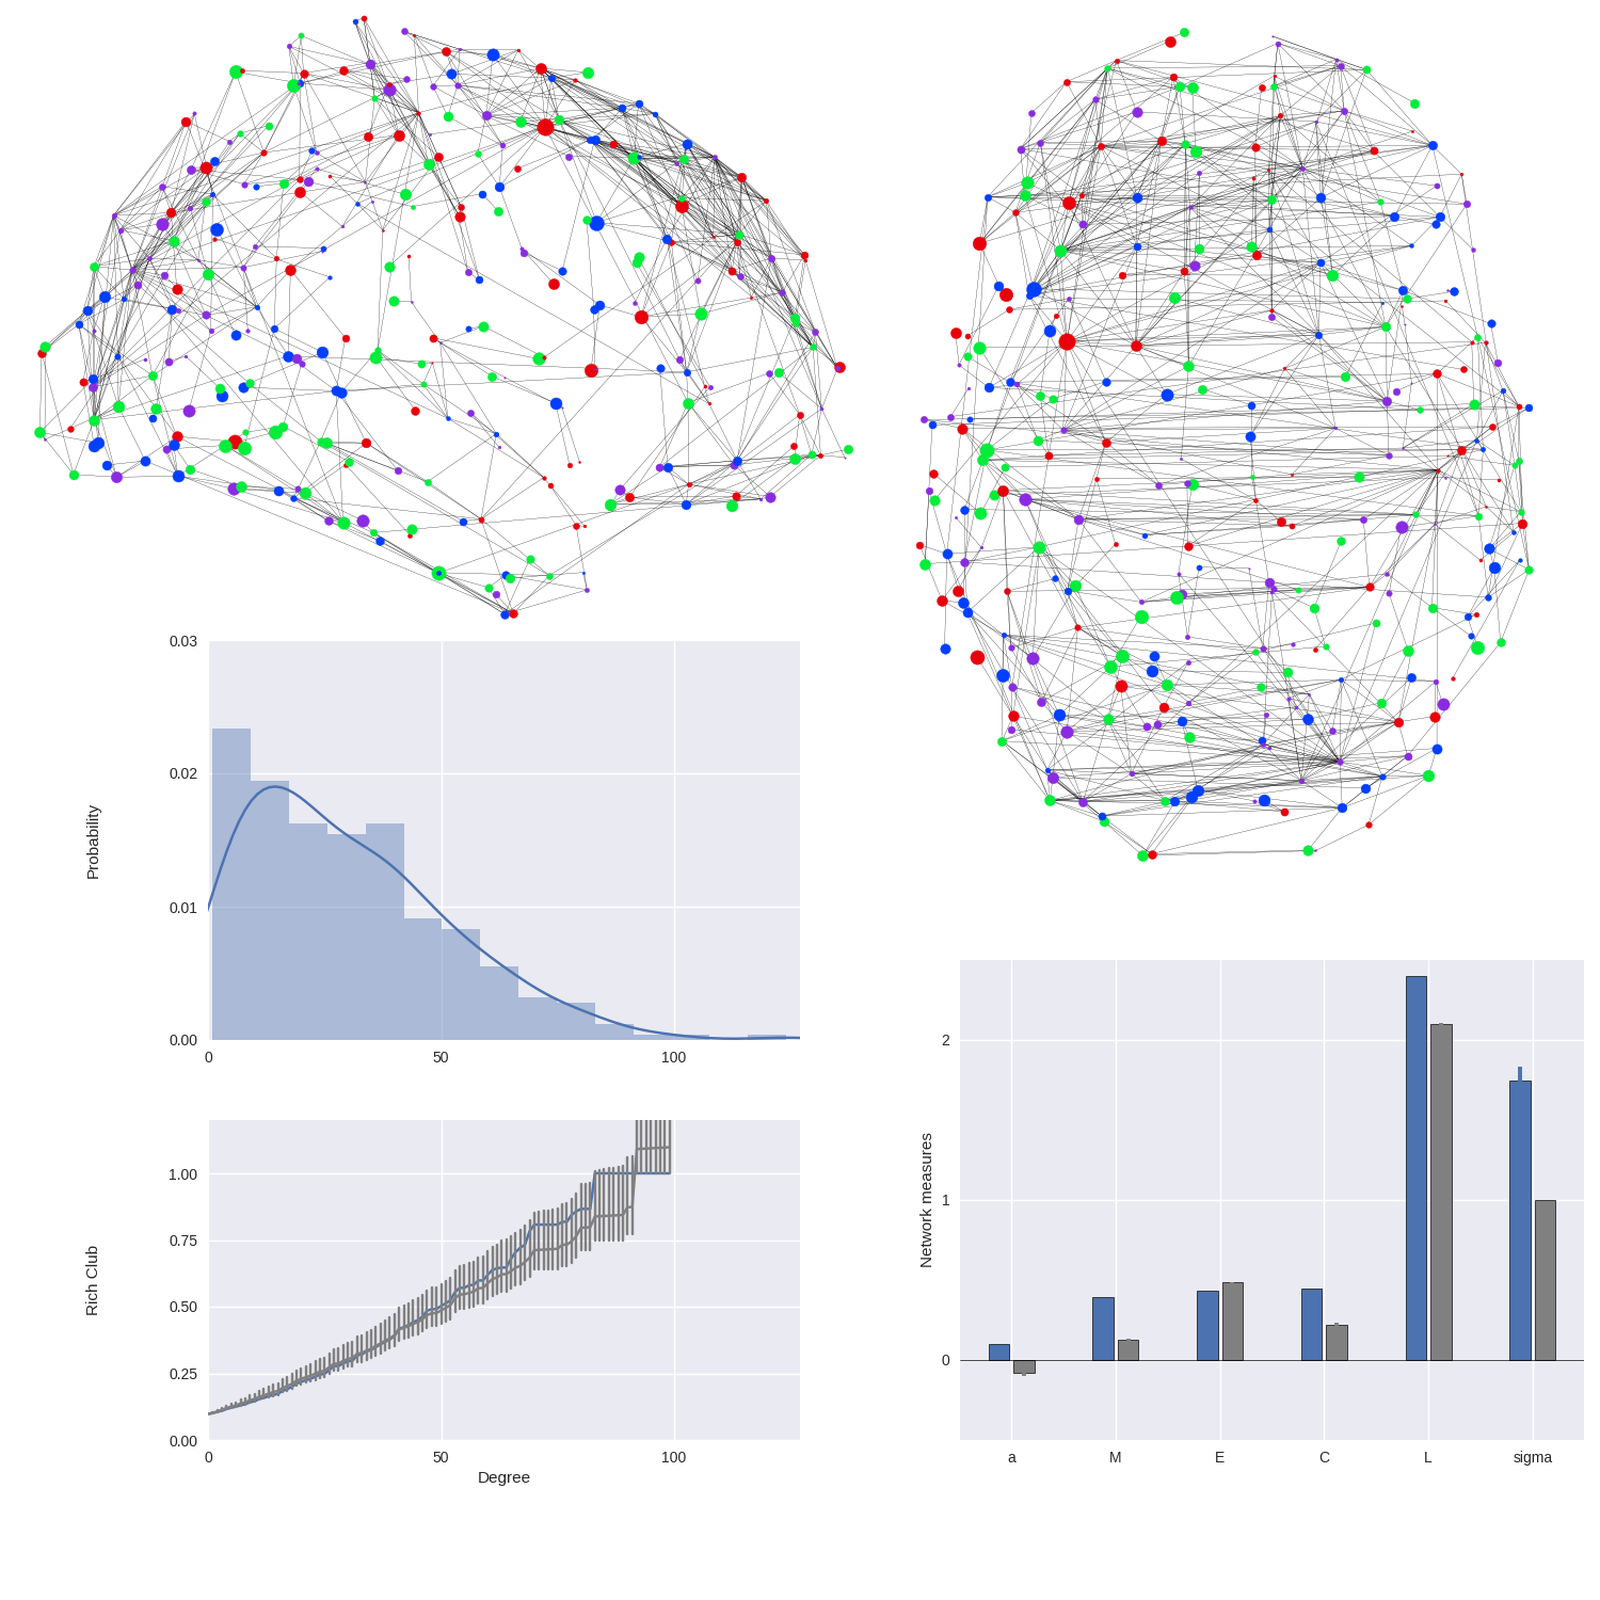

In [5]:
# We will be using the files we just used network_analysis_from _corrmat to create
NodalMeasures=network_analysis+'/NodalMeasures_corrmat_file_COST010.csv'
GlobalMeasures=network_analysis+'/GlobalMeasures_corrmat_file_COST010.csv'
RichClub=network_analysis+'/RICH_CLUB_corrmat_file_COST010.csv'
# We're going to save them in a folder called figures
figures_dir=os.getcwd()+'/figures'

import make_figures as mfg
mfg.network_summary_fig(corrmat_file, NodalMeasures, GlobalMeasures, RichClub, figures_dir)
Image("figures/NetworkSummary_LowRes.png")

### How can others help?:
In general you can check out our project [roadmap](https://github.com/WhitakerLab/BrainNetworksInPython/issues/12) and our [GitHub issues](https://github.com/WhitakerLab/BrainNetworksInPython/issues)
* network science expertise?
    * We are looking at ways to build a null distribution of brain networks to assess significance of comparisons between two cohorts [issue #13](https://github.com/WhitakerLab/BrainNetworksInPython/issues/13)
* We are running a session at mozfest where we'd like to get BrainNetworksInPython working on attendees computers, so if anyone has *any* idea how to do that, please hit us up! [issue #23](https://github.com/WhitakerLab/BrainNetworksInPython/issues/23)
* Feedback! on our [readme](https://github.com/WhitakerLab/BrainNetworksInPython/blob/master/README.md) and [beginner's guide](https://github.com/WhitakerLab/BrainNetworksInPython/blob/master/Example_JupyterNotebook.ipynb)
* [Help us choose a name!](https://poll.ly/#/Gx4yMMY7)

__ Easiest way to get in touch with us: __ The BrainNetworksInPython [Gitter chat](https://gitter.im/WhitakerLab/BrainNetworksInPython)